<a href="https://colab.research.google.com/github/nixonleonard/LinierRegression-ML-Study/blob/main/LinierRegression%20with%20Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.metrics import r2_score as r2s
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Membaca Datasets**

In [ ]:
url = 'https://raw.githubusercontent.com/mk-gurucharan%20/Regression/master/Startups_Data.csv'
mlr = pd.read_csv(url)
mlr.shape

(50, 5)

**Deklarasi nilai X(data) dan y(target)**

In [ ]:
X = mlr[['R&D Spend','Administration','Marketing Spend']]
y = mlr['Profit']
mlr

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**Standarisasi Data**

In [ ]:
sc = StandardScaler()
X_trans = sc.fit_transform(X)
X_trans

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

**Modeling & Gradient Descent**

*referensi : https://github.com/GUNAND12/multi_linear-Gradient-descent/blob/main/gradient_descent.ipynb*

In [ ]:
def profitPred(w,X,b):                          #disini w sebagai weight, b sebagai bias/intercept
    predList=[]
    for i in range(len(X)):
        predList.append(w@X[i]+b)
    return np.array(predList)

def linLost(y,predY):                             #disini menghitung linier lostnya
    s=0
    for i in range(len(y)):
        s+=(y[i]-predY[i])**2
    return (1/len(y))*s

def derLostW(X,y,predY):                    #menghitung derivative loss w.r.t untk weight
    s=0
    n=len(y)
    for i in range(n):
        s+=-X[i]*(y[i]-predY[i])
    return (2/n)*s
    
def derLostB(y,predY):                    #menghitung derivative loss w.r.t untk weight
    s=0
    for i in range(len(y)):
        s+=-(y[i]-predY[i])
    return (2/len(y)) * s
        
def gradientDescent(X,y):              #disini fungsi gradient descentnya
    wVector=np.random.randn(X.shape[1])        #weight vector
    b=0                                                               #intercept / bias
    epoch = 2000
    n = len(X)
    linLostList=[]                                                       #linierlost
    learningRate = 0.001

    for i in range(epoch):
        predY = profitPred(wVector,X,b)
        wVector = wVector - learningRate *derLostW(X,y,predY) 
        b = b - learningRate * derLostB(y,predY)
        linLostList.append(linLost(y,predY))
        
    plt.plot(np.arange(1,epoch),linLostList[1:])
    plt.xlabel("epoch number")
    plt.ylabel("the linier loss")
    
    return wVector,b
    

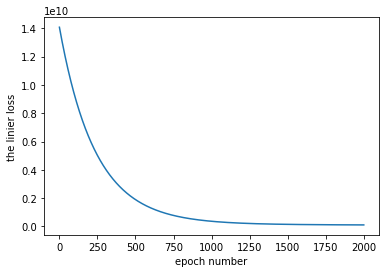

In [ ]:
weight, bias = gradientDescent(X_trans, y) 

**Nilai bias / intercept**

In [ ]:
bias

109969.25700527898

**Nilai weight**

In [ ]:
weight

array([29865.02026029,  1629.91191066,  9674.77230683])

**Prediksi dari nilai weight dan bias yang didapat**

In [ ]:
def prediction(X):
    predList = []
    for i in range(len(X)):
        predList.append(weight@X[i]+bias)
    return np.array(predList)

**Hasil prediksi dari perhitungan diatas**

In [ ]:
predictedProfit = prediction(X_trans)
predictedProfit

array([191942.20384927, 188756.21783608, 176912.88853807, 170005.51744104,
       165552.88525679, 159059.69056309, 144852.81726433, 157592.86429365,
       150388.47888893, 149341.09576747, 129315.36720674, 129039.67681205,
       126660.31739633, 126136.5118511 , 146051.39129187, 140916.29715294,
       117065.66254137, 130841.08723213, 128100.63607686, 103341.61829476,
       118197.66704924, 122031.82699189, 117608.60223106, 112476.58057028,
       105226.59999854,  99248.01223459, 106213.52611116, 120651.81776173,
       101108.10144315,  98195.08085794,  92345.59760986,  93726.46208639,
        90473.28811133,  97203.27049356,  94147.22901868,  89185.87745473,
        79900.10949534,  85245.90658183,  69498.67030059,  81725.67692193,
        77195.57939069,  73976.05012336,  70539.83270022,  58038.389166  ,
        63459.5477494 ,  45627.59499592,  68935.91960384,  45480.49361086,
        40919.61918095,  48006.69486404])

**Prediksi dari fungsi LinearRegression dari sklear linear_model**

In [ ]:
multiLR = lm.LinearRegression()
multiLR.fit(X,y)

LinearRegression()

**Hasil prediksi dari perhitungan diatas**

In [ ]:
predictProfit = multiLR.predict(X)
predictProfit

array([192521.25289008, 189156.76823227, 182147.2790962 , 173696.70002553,
       172139.51418327, 163580.7805712 , 158114.09666865, 160021.36304781,
       151741.69969865, 154884.68410995, 135509.01636714, 135573.71296074,
       129138.05418243, 127487.99166275, 149548.64633453, 146235.1599852 ,
       116915.40540144, 130192.44720781, 129014.2268059 , 115635.21636716,
       116639.6692309 , 117319.45164029, 114706.98171695, 109996.61522126,
       113362.96611314, 102237.72506481, 110600.5753503 , 114408.07145684,
       101660.02600497, 101794.98345176,  99452.37293606,  97687.85627575,
        99001.32898549,  97915.00780465,  89039.27374116,  90511.59956753,
        75286.17458546,  89619.5377079 ,  69697.43064804,  83729.01197692,
        74815.95399105,  74802.55623866,  70620.41182056,  60167.03996335,
        64611.3549157 ,  47650.64968691,  56166.20685261,  46490.58898335,
        49171.38815763,  48215.1341113 ])

**Membandingkan Ground Truth dengan Prediction hasil perhitungan**

In [ ]:
printProfitsPredict = pd.DataFrame({
    'Profit' : y,
    'Prediction' : np.round(predictedProfit,2)
})
printProfitsPredict

,Profit,Prediction
0,192261.83,191942.20
1,191792.06,188756.22
2,191050.39,176912.89
3,182901.99,170005.52
4,166187.94,165552.89
5,156991.12,159059.69
6,156122.51,144852.82
7,155752.60,157592.86
8,152211.77,150388.48
9,149759.96,149341.10


In [ ]:
r_squared = r2s(y,predictedProfit) 
r_squared

0.9350719503222347

In [ ]:
mean_squared_error(y,predictedProfit)

103371714.79656982